In [9]:
def jak():

    import re
    import nltk
    from PIL import Image                                   # conda install -c anaconda pillow. This allows us to make masks in our word clouds
    import time 
    import numpy as np
    import pandas as pd
    from pathlib import Path    
    from textblob import TextBlob
    from pathlib import Path
    import matplotlib.pyplot as plt
    from wordcloud import WordCloud
    import os
    import plotly.express as px
  
    import warnings
    warnings.filterwarnings('ignore')
    
    tweet_df = pd.read_csv(Path('dogecoin_tweets.csv')) 
    tweet_df.head()

    # Scatter plot of polarity scores. 

    plt.scatter(tweet_df.Polarity, tweet_df.Subjectivity, color='red')
    plt.title('DogeCoin Sentiment Analysis Previous Week')
    plt.xlabel('Polarity')                      # 0.00 is neutral
    plt.ylabel('Subjectivity')

    # Plotly pie chart of data
    
    fig = px.pie(tweet_df, values ='Sentiment', names ='index' )
    fig.show()

    # create stopwords
    nltk.download('stopwords')
    stpwrd = set(nltk.corpus.stopwords.words('english'))

    # Combining all tweets text
    allWords = ' '.join([twts for twts in tweet_df['Tweets']])

    # Bring in an image of Elon as a mask to shape our word cloud.
    mask = np.array(Image.open('dogecoin_pup.jpg'))


    # Define a function WC to make word cloud.

    def WC(data, title, mask=None):
        wc =  WordCloud(                              # make a WordCloud object.
        width = 500,
        height = 500,
        scale=3,
        random_state=21,
        colormap='autumn',
        mask=mask,
        stopwords=stpwrd,
        collocations=True
        ).generate(data)                                # take the allWords and generate cloud based on that. 

        plt.figure(figsize=(20,12))
        #Cloud.to_file(str(title)+'.png') 
        plt.imshow(wc)
        plt.axis('off')
        fontdict = {'fontsize' : 20, 'fontweight' : 'bold'}
        plt.title(title, fontdict=fontdict)
        plt.show()                                      # no return statement???? 

    # call the WC function, pass 

    WC(allWords, 'DogeCoin 1-Week Sentiment', mask=mask)              # no word cloud is produced by this line.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jakel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


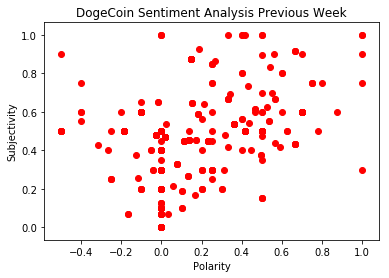

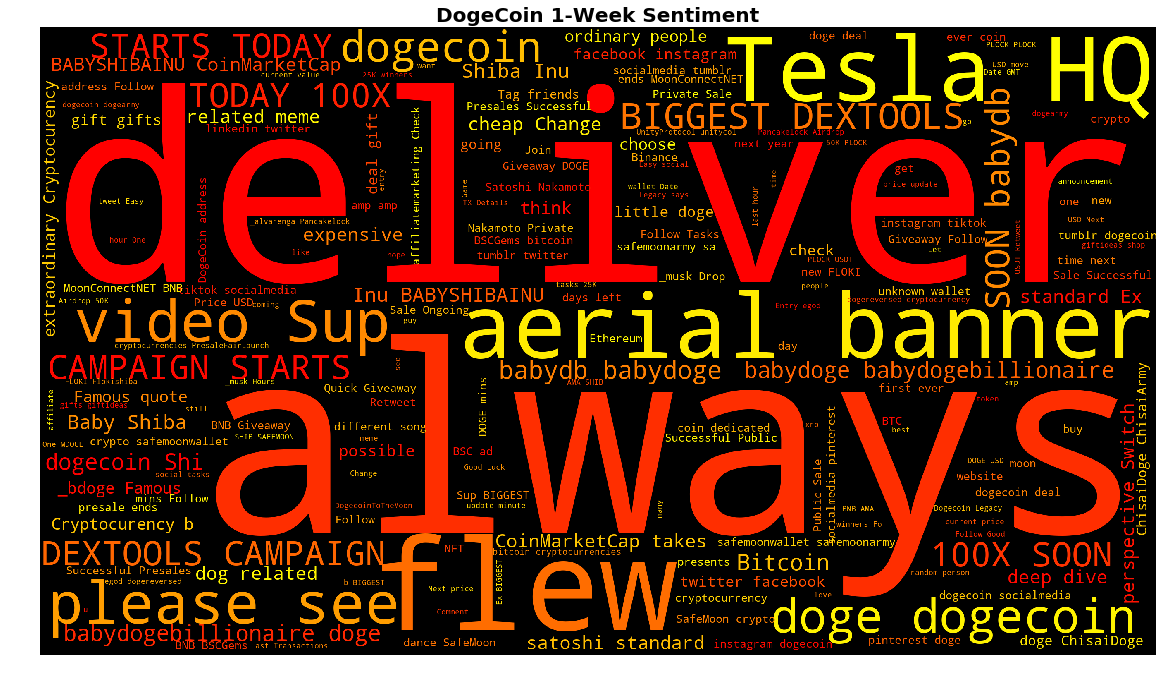

In [10]:
var = jak()